In [1]:
import numpy as np
import matplotlib.pyplot as plt
import connection_length as cnc
from importlib import reload

In [2]:
cnc.store_coordinate_arrays("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/12/12.scratch/")

In [2]:
X,Z,Psi = cnc.read_coordinates("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/12/12.scratch/")

In [4]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [3]:
xs,zs,conn = cnc.read_connection_lengths("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/12/12.scratch/",32)

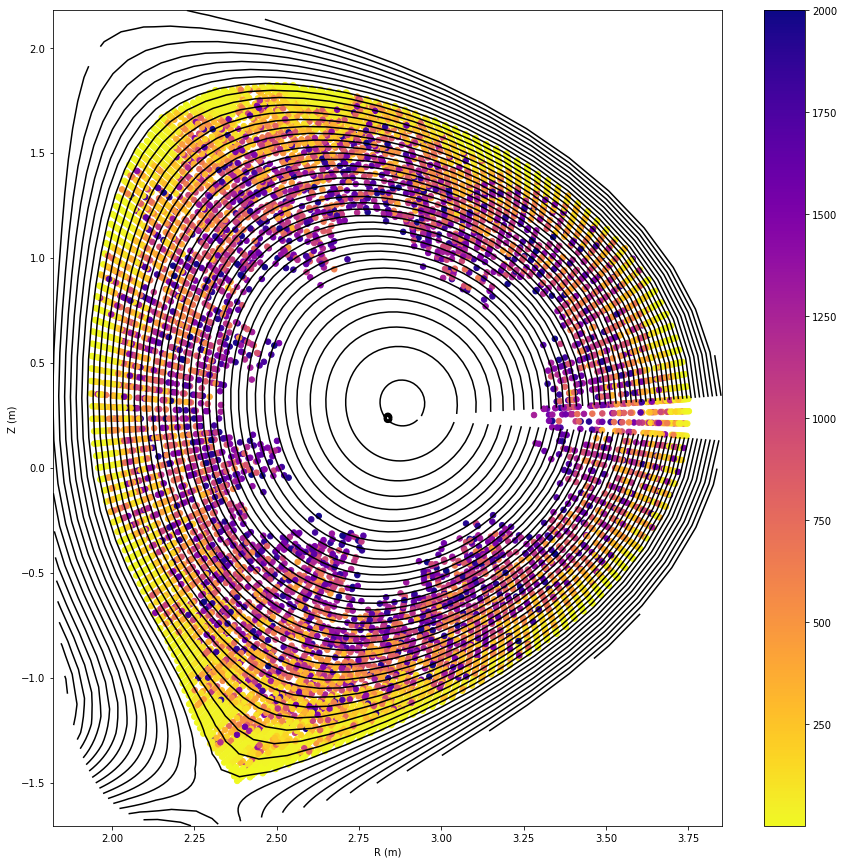

In [9]:
plt.figure(figsize=(15,15))
plt.scatter(xs,zs,c=conn, cmap='plasma_r',s=30)
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.colorbar()
plt.contour(X[:,:,0],Z[:,:,0],Psi[:,:,0],60, colors='k')
plt.show()

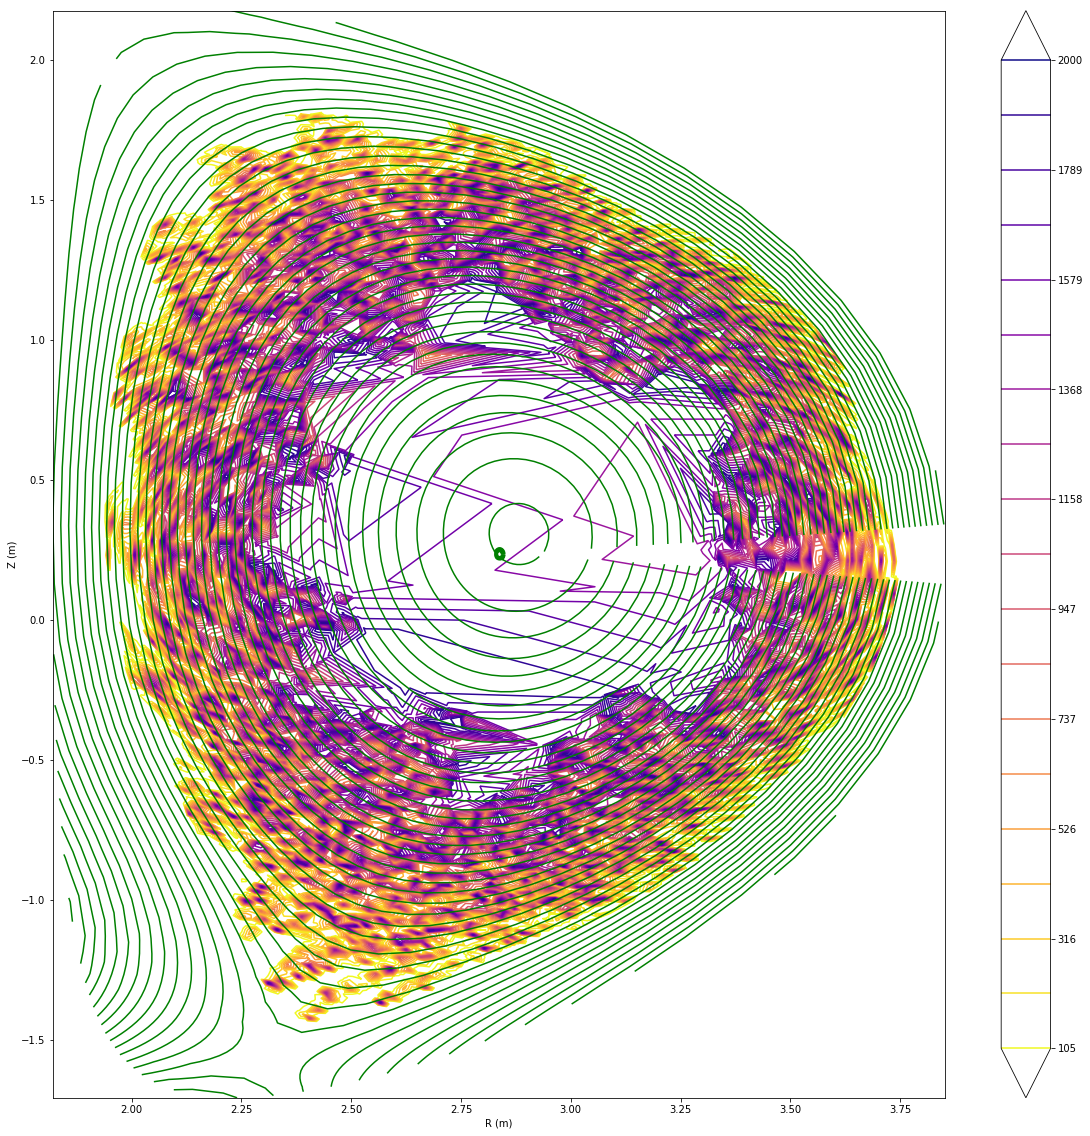

In [12]:
plt.figure(figsize=(20,20))
cs = plt.tricontour(xs,zs,conn,levels=np.linspace(0,2000,20),cmap='plasma_r',extend='both')
#plt.plot(xs,zs,'o')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
plt.colorbar()
plt.contour(X[:,:,0],Z[:,:,0],Psi[:,:,0],60, colors='green')
plt.show()

## Interpolation on a grid

In [13]:
import matplotlib.tri as tri

In [14]:
xi = np.linspace(1.8,3.8,200)
yi = np.linspace(-1.4,2.1,200)

In [15]:
triang = tri.Triangulation(xs,zs)
interpolator = tri.LinearTriInterpolator(triang, conn)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

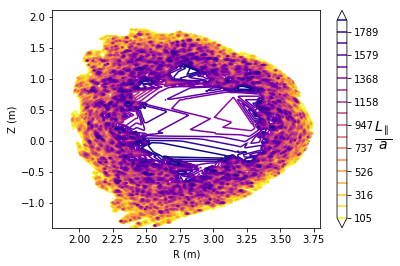

In [26]:
plt.contour(Xi,Yi,zi,levels=np.linspace(0,2000,20),cmap='plasma_r',extend='both')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
cbar = plt.colorbar()
cbar.set_label(r'$\frac{L_{\parallel}}{a}$',rotation=360,fontsize=20)
#plt.contour(X[:,:,0],Z[:,:,0],Psi[:,:,0],60, colors='green')
plt.show()